# YOLOv8 model for object detection
This model is has been trained on a dataset that is shown in the "google_scraped_dataset" folder. This dataset has been labeled manually that identifies the types of bees.


0: 640x640 1 Allodapula, 1 Apis-mellifera-scutellata, 1 Braunsapis, 1 Lasioglossum, 1 Meliponula, 1 Seladonia, 1 Thyreus, 2 Xylocopas, 93.6ms
Speed: 1.9ms preprocess, 93.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


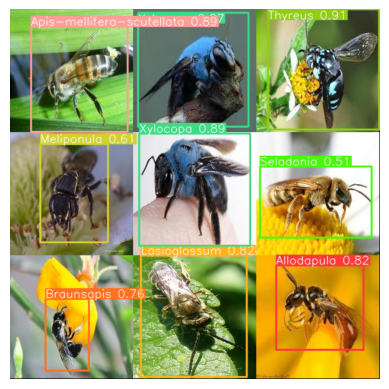

In [3]:
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


model_path = "models/aug_test_1_train_1.pt"
frame_path = "Dataset/Dataset_tools/mosaic_creator/mosaic_2.jpg"

def infer_and_plot(model_path, frame, conf_threshold):
    model = YOLO(model_path)
    yolo_detections = model.predict(
        frame,
        iou=0.7,
        agnostic_nms=True,
        conf=conf_threshold,
    )
    result_image = yolo_detections[0].plot()
    return result_image

result_image = infer_and_plot(model_path, cv2.imread(frame_path), conf_threshold=0.25)
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
result_image_pil = Image.fromarray(result_image_rgb)
plt.imshow(result_image_pil)
plt.axis('off')
plt.savefig("inf_mosaic.png", dpi=1000)
plt.show()
